# Project VI - Solution of Initial Value Problems

In [1]:
#################### DO NOT CHANGE ####################
# All libraries will be imported in this cell
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import fsolve as fs
from tabulate import tabulate as table
######################################################

Consider the initial-value-problem:

$$
\begin{align*}
x^{''}(t)+2\gamma x^{'}+\omega^{2} x(t)=0 \\
x(0)=x_0 \\ 
x^{'}(0)=\gamma x_0
\end{align*}
$$

with $0 < \gamma < \omega$. It's solution is given by
$$x(t)=x_0 e^{-\gamma t} \cos(\beta t)$$

where $\beta = \sqrt{\omega^{2}-\gamma^{2}}$. This equation can be written as a first order system, with $x^{'}=y$, and $y^{'}=-2\gamma y - \omega^2 x$.

In [2]:
#################### DO NOT CHANGE ####################
global x0, steps, gamma, omega
######################################################

## Your task

### Explicit Midpoint

Implement the Explicit Midpoint method (EMP) doing
$$\frac{x_{n+1}−x_{n−1}}{2h}=y_n\\
\frac{y_{n+1}−y_{n−1}}{2h}=−2\gamma y_n− \omega^2x_n $$

In [3]:
#################### DO NOT CHANGE ####################
def mid_point():    
    y = np.zeros(steps+1)
    xl = np.zeros(steps+1)
    
    xp0 = x0 * gamma
    
    xl[0] = x0
    y[0] = xp0
    
    for i in range(0, steps):
        if i == 0:
            xl[i+1] = 2 * h * y[i]
            y[i+1] = -4 * gamma * h * y[i] - 2 * omega**2 * h * xl[i]
        else:
            xl[i+1] = xl[i-1] + 2*  h * y[i]
            y[i+1] = y[i-1] - 4 * gamma * h * y[i] - 2 * omega**2 * h * xl[i]
    return xl
######################################################

### Implicit Midpoint

Implement the Implicit Midpoint method (IMP) doing
$$ \frac{x_{n+1}−x_n}{h}=\frac{y_{n+1}+y_n}{2}\\
\frac{y_{n+1}−y_n}{h}=−2\gamma \frac{y_{n+1}+y_n}{2}−\omega^2\frac{x_{n+1}+x_n}{2}$$

In [4]:
#################### DO NOT CHANGE ####################
def IMP(p):
    X, Y = p
    
    deriv = np.array([0., 0.])
    deriv[0] = (Y + x_imp[1]) / 2 - (X - x_imp[0]) / h
    deriv[1] = -2 * gamma * (Y + x_imp[1]) / 2 - omega**2 * (X + x_imp[0]) / 2 - (Y - x_imp[1]) / h
    
    return deriv

def implicit_mid_point():    
    global x_imp
    x_imp = np.array([x0, xp0])
    traj = x_imp

    for i in range(1, steps+1):
        x_new = fs(IMP, x_imp) 
        traj = np.vstack([traj, x_new])
        x_imp = x_new
    
    return traj
######################################################

### Non-Standard Implicit Midpoint

Implement the Non-standard Implicit Midpoint method (NSIMP) doing
$$\frac{x_{n+1}−e^{−\gamma h}x_n}{h}=\frac{y_{n+1}+e^{−\gamma h}y_n}{2}\\
\frac{y_{n+1}−e^{−\gamma h}y_n}{h}=−\omega^2\frac{x_{n+1}+e^{−\gamma h}x_n}{2}$$

In [5]:
#################### DO NOT CHANGE ####################
def NSIMP(p):
    X, Y = p
    deriv = np.array([0., 0.])
    deriv[0] = (Y + np.exp(-gamma * h) * x_nsimp[1]) / 2 - (X - np.exp(-gamma * h) * x_nsimp[0]) / h
    deriv[1] = -omega**2 * (X + np.exp(-gamma * h) * x_nsimp[0]) / 2 - (Y - np.exp(-gamma * h) * x_nsimp[1]) / h
    
    return deriv

def ns_implicit_mid(): 
    global x_nsimp
    x_nsimp = np.array([x0, xp0])
    traj = x_nsimp

    for i in range(1, steps+1):
        x_new = fs(NSIMP, x_nsimp) 
        traj = np.vstack([traj, x_new])
        x_nsimp = x_new
    
    return traj
######################################################

 - All three methods are second order and they do not differ much in terms of computational cost; demonstrate this numerically.  I expect several table with the results.

 - For $\gamma=0$  the  implicit  methods  are  equivalent,  and  we  expect  they  are  superior  to  the explicit method; check this numerically using long time simulations with varioush, $\omega$, $x_0$.

- Experiment on the long-time accuracy of the methods for small values of $\gamma>0$.

- Run experiments to help you fully understand what happens to the approximations as $\gamma$ increases.

- If there is, in fact, a ’breaking point’ for any method as $\gamma$ increases determine what it is and how it depends upon $h$ or $\omega$.

In [6]:
#################### DO NOT CHANGE ####################
def exact():
    y = np.zeros(steps+1)
    b = np.sqrt((omega**2) - (gamma**2))
    
    for i in range(0, (steps+1)):
        y[i] = x0 * np.exp(-gamma * t[i]) * np.cos(b * t[i])
    return y

def relative_error(exact, approx, steps):
    rel = np.zeros((steps+1,))
    
    for i in range(0, steps+1):
        rel[i] = abs(exact[i] - approx[i]) / abs(exact[i])
        
    return rel
######################################################

In [7]:
#################### DO NOT CHANGE ####################
def results(t, x_m, x_i, x_n, err1, err2, err3, x_ex):
    return list(zip(range(x_m.shape[0]), t, x_m, x_i, x_n, err1, err2, err3, x_ex))
######################################################

In [8]:
#################### DO NOT CHANGE ####################
def main():
    global t0, h, xp0, t

    t0 = 0
    tf = 1
    h = (tf - t0) / steps
    xp0 = x0 * gamma
    t = np.arange(t0, tf + h, h)

    x_m = mid_point()
    x_i = implicit_mid_point()
    x_n = ns_implicit_mid()
    x_ex = exact()

    error_mid = relative_error(x_ex, x_m, steps)
    error_imp = relative_error(x_ex, x_i[:,0], steps)
    error_nsimp = relative_error(x_ex, x_n[:,0], steps)
    error_exact = relative_error(x_ex, x_ex, steps)

    plt.figure(figsize=(9, 5))
    plt.plot(t, x_ex, "limegreen", label="Exact Solution")
    plt.plot(t, x_m, "cornflowerblue", label="EMP")
    plt.plot(t, x_i[:,0], "blueviolet", label="IMP")
    plt.plot(t, x_n[:,0], "darkorange", label="NSIMP")
    plt.xlabel("time")
    plt.ylabel("x(t)")
    plt.title("Exact solution and methods")
    plt.legend(loc="upper right", fontsize="small")
    plt.show()

    plt.figure(figsize=(9,5))
    plt.plot(t, error_exact, "limegreen", label="Exact Error")
    plt.plot(t, error_mid, "cornflowerblue", label="EMP Error")
    plt.plot(t, error_imp, "blueviolet", label="IMP Error")
    plt.plot(t, error_nsimp, "darkorange", label="NSIMP Error")
    plt.xlabel("time")
    plt.ylabel("x(t)")
    plt.title("Errors")
    plt.legend(loc="upper right", fontsize="small")
    plt.show()

    print()
    print(f"Testing using: steps = {steps}, x0 = {x0}, gamma = {gamma}, omega = {omega}.", end="\n\n\n\n")
    table_results = results(t, x_m, x_i[:,0], x_n[:,0], error_mid, error_imp, error_nsimp, x_ex)
    print(table(table_results, headers=["n", "t", "x_mid", "x_imp", "x_nsimp", "err_mid", "err_imp", "err_nsimp", "exact"]))
    
    return
######################################################

### Testing `steps`, `x0`, `gamma` & `omega` begins here.

#### Testing instructions:
Please **do not add, edit, or delete** anything marked with: `#################### DO NOT CHANGE ####################`

When testing different values, copy and paste the following snippet in separate cells:
```python
steps = 10
x0 = 1
gamma = 0.1
omega = 1
main()
```

- Change ONLY ONE parameter at a time (parameters: `steps`, `x0`, `gamma`, and `omega`)
- Add a comment in respective code cell or in Markdown cell below outputs about changes you've noticed
- To see the changes in errors, look at the last row in table see how close the errors are to 0
- If you notice that any values go into the negatives, please add: `### BREAKING POINT ###` at the top of the code cell
- Keep all of your testing results


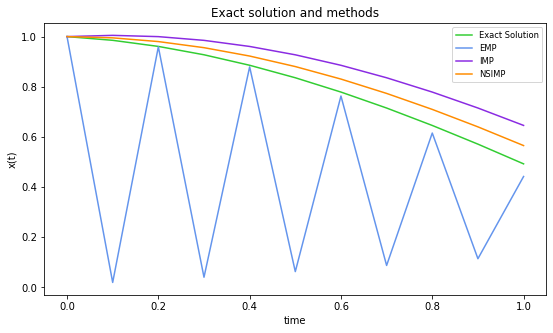

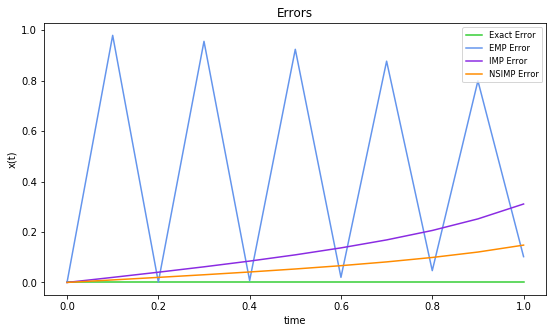


Testing using: steps = 10, x0 = 1, gamma = 0.1, omega = 1.



  n    t      x_mid     x_imp    x_nsimp     err_mid    err_imp    err_nsimp     exact
---  ---  ---------  --------  ---------  ----------  ---------  -----------  --------
  0  0    1          1          1         0           0           0           1
  1  0.1  0.02       1.00494    0.994988  0.979699    0.0200833   0.00998282  0.985153
  2  0.2  0.9592     0.999854   0.98015   0.00172211  0.0405878   0.0200813   0.960855
  3  0.3  0.040832   0.984994   0.955829  0.955978    0.0619517   0.0305077   0.927532
  4  0.4  0.879199   0.9607     0.922456  0.00733363  0.0846864   0.0415059   0.885694
  5  0.5  0.0632308  0.927398   0.880542  0.924358    0.10943     0.0533769   0.835923
  6  0.6  0.763134   0.885594   0.830674  0.0202012   0.137027    0.0665156   0.778868
  7  0.7  0.0877429  0.835868   0.773509  0.877323    0.168659    0.0814715   0.715237
  8  0.8  0.615563   0.77887    0.70976   0.0468094   0.20607     0.099053

In [9]:
# SCENARIO 1:

# (Adding comment about results in code cell)
# Using the values below, I noticed that there was a significant error with IMP, 
# but that EMP appears to have the smallest error (0.102301) and is the closest to 0.

steps = 10
x0 = 1
gamma = 0.1
omega = 1
main()

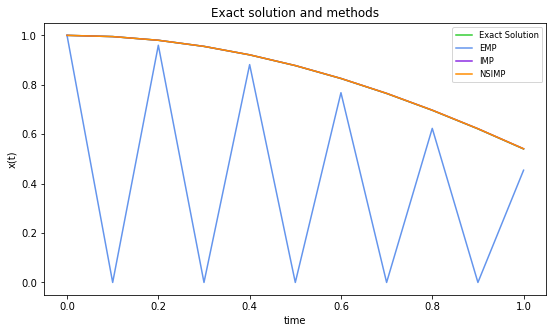

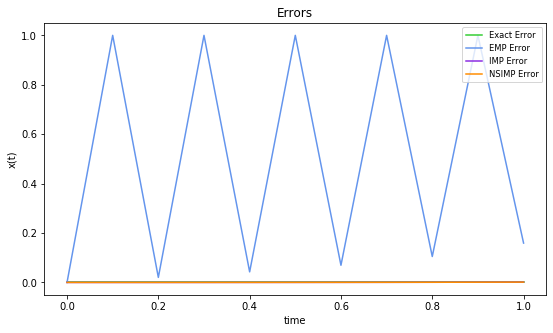


Testing using: steps = 10, x0 = 1, gamma = 1e-05, omega = 1.



  n    t        x_mid     x_imp    x_nsimp    err_mid      err_imp    err_nsimp     exact
---  ---  -----------  --------  ---------  ---------  -----------  -----------  --------
  0  0    1            1          1         0          0            0            1
  1  0.1  2e-06        0.995013   0.995012  0.999998   1.03528e-05  9.34776e-06  0.995003
  2  0.2  0.96         0.980102   0.9801    0.0204727  3.77764e-05  3.5746e-05   0.980065
  3  0.3  4.08e-06     0.955413   0.95541   0.999996   8.33763e-05  8.0278e-05   0.955334
  4  0.4  0.8816       0.921195   0.921191  0.0428391  0.000149124  0.000144889  0.921057
  5  0.5  6.3104e-06   0.877787   0.877782  0.999993   0.000238129  0.000232658  0.877578
  6  0.6  0.767936     0.825624   0.825618  0.0695414  0.000355119  0.000348268  0.825331
  7  0.7  8.74304e-06  0.765225   0.765218  0.999989   0.000507281  0.000498847  0.764837
  8  0.8  0.623555     0.697193   0.697186

In [10]:
# SCENARIO 2:
# (Adding comments in Markdown cell)
steps = 10
x0 = 1
gamma = 0.00001
omega = 1
main()

#### SCENARIO 2:
When using `gamma = 0.00001`, the errors for `IMP` and `NSIMP` are closer to 0, but the error for `EMP` grew significantly compared to `gamma = 0.1`.

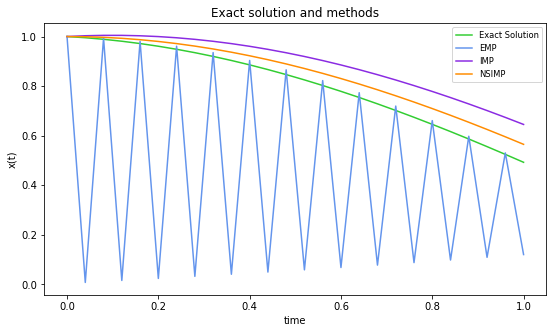

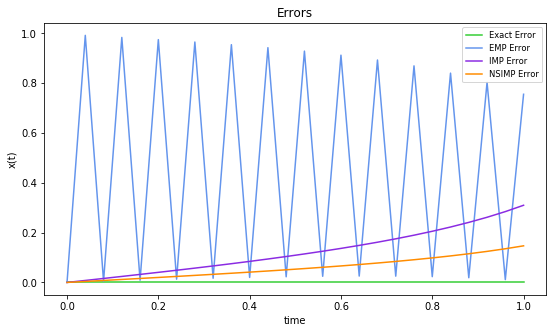


Testing using: steps = 25, x0 = 1, gamma = 0.1, omega = 1.



  n     t      x_mid     x_imp    x_nsimp     err_mid    err_imp    err_nsimp     exact
---  ----  ---------  --------  ---------  ----------  ---------  -----------  --------
  0  0     1          1          1         0           0           0           1
  1  0.04  0.008      1.00319    0.999194  0.991962    0.008005    0.00399378  0.995219
  2  0.08  0.993472   1.00475    0.996787  0.00463265  0.0160358   0.00798457  0.988891
  3  0.12  0.0160532  1.0047     0.992795  0.983636    0.0241183   0.011985    0.981037
  4  0.16  0.980457   1.00305    0.987238  0.00902985  0.0322788   0.0160081   0.971683
  5  0.2   0.024212   0.999812   0.980136  0.974802    0.0405447   0.020067    0.960855
  6  0.24  0.961036   0.99501    0.971514  0.0131296   0.0489449   0.0241755   0.948582
  7  0.28  0.0325265  0.988661   0.961398  0.965208    0.05751     0.0283484   0.934895
  8  0.32  0.935332   0.980788   0.949816  0.0168553   0.0662728

In [11]:
# SCENARIO 3:
# Changing gamma back to 0.1, and steps to 25: the error for EMP grew significantly (0.755411), compared to (0.102301) when steps = 10. 
# There weren't any significant changes in errors for IMP and NSIMP.
steps = 25
x0 = 1
gamma = 0.1
omega = 1
main()